In [ ]:
from keras.datasets import imdb
import pandas as pd
from keras.models import Sequential
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.layers import Input,Dense,Embedding,SpatialDropout1D,add,concatenate
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split
from nltk.stem.wordnet import WordNetLemmatizer
lem=WordNetLemmatizer()

In [ ]:
from google.colab import files
files.upload()

Saving lstm_data_imdb.csv to lstm_data_imdb.csv
Saving glove.6B.50d.txt to glove.6B.50d.txt


KeyboardInterrupt: ignored

In [ ]:
data_all=pd.read_csv('/content/lstm_data_imdb.csv')

data=data_all[['Review','Sentiment']]
data.shape

(497, 2)

In [ ]:
from nltk.corpus import stopwords
#import nltk
#stop=stopwords.words('english')
#stop=set(nltk.corpus.stopwords.stop('english'))
import nltk
nltk.download('stopwords')
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves" ]
             

In [ ]:
import nltk
nltk.download('wordnet')
replace_space=re.compile('[/(){}\[\]\!@,:;]')
bad_symbol=re.compile('[^0-9a-z #+_]')
def remove_stopwords(text):
  token=text.lower()
  token=re.sub('<.*?>','',token)
  token=replace_space.sub(' ',token)
  token=bad_symbol.sub('',token)
  token = [i for i in token if token not in stop]
  token=[lem.lemmatize(word) for word in token]
  token=''.join(token)
  return token

#data_without_stopwords = remove_stopwords(data)
data['clean_review']=data['Review'].apply(lambda x:remove_stopwords(x))
data['clean_review']=data['clean_review'].str.translate(string.punctuation)
#data['clean_output']=data['clean_output'].apply(lambda cw : remove_tags(cw))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data

,Review,Sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
...,...,...,...
492,My Father The Hero used to be my favorite movi...,positive,my father the hero used to be my favorite movi...
493,It is surprising that a production like this g...,positive,it is surprising that a production like this g...
494,I just don't get some of the big premises of t...,negative,i just dont get some of the big premises of th...
495,This is one of my all time favorite movies and...,positive,this is one of my all time favorite movies and...


In [ ]:
data['clean_review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy  ...
4    petter matteis love in the time of money is a ...
Name: clean_review, dtype: object

In [ ]:
reviews = data['clean_review']
reviews

0      one of the other reviewers has mentioned that ...
1      a wonderful little production the filming tech...
2      i thought this was a wonderful way to spend ti...
3      basically theres a family where a little boy  ...
4      petter matteis love in the time of money is a ...
                             ...                        
492    my father the hero used to be my favorite movi...
493    it is surprising that a production like this g...
494    i just dont get some of the big premises of th...
495    this is one of my all time favorite movies and...
496    i know that youve already entered this in film...
Name: clean_review, Length: 497, dtype: object

In [ ]:
reviews_list = []
for i in range(len(reviews)):
  reviews_list.append(reviews[i])


In [ ]:
reviews_list

['one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right  as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go trust me  this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs  sex or violence its is hardcore  in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda em city is home to manyaryans  muslims  gangstas  latinos  christians  italians  irish and moreso scuffles  death stares  dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forg

In [ ]:
sentiment = data['Sentiment']

In [ ]:
x=reviews_list
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, sentiment)))

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)



In [ ]:
sequence=tokenizer.texts_to_sequences(x)
print('%s unique tokens ',len(sequence))

%s unique tokens  497


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
embedding_index=dict()
f=open(r'/content/glove.6B.50d.txt',encoding="utf8")
for line in f:
  values=line.split()
  word=values[0]
  coef=np.asarray(values[1:],dtype='float32')
  embedding_index[word]=coef
f.close()
print('word vectors %s' %len(embedding_index))

word vectors 59945


In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

14256

In [ ]:
embedding_matrix=np.zeros((vocab_size,300))
embedding_matrix.shape

(14256, 300)

In [ ]:
for i,word in tokenizer.word_index.items():
  embeding_vector=embedding_index.get(word)
  if embeding_vector is not None:
    embedding_matrix[i]=embeding_vector
    print(embedding_matrix)

In [ ]:
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=150)
x

array([[2476,  602,    6, ...,   91, 3137,  604],
       [   0,    0,    0, ..., 3139,   82,  215],
       [ 216,    8,   12, ...,   55,   14,  357],
       ...,
       [   0,    0,    0, ..., 1059,  391,  439],
       [ 234,   14,    3, ...,   21,  244,   57],
       [   0,    0,    0, ...,    3,  149,    4]], dtype=int32)

In [ ]:
y=pd.get_dummies(y).values

In [ ]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1,

In [ ]:
print('shape of x tensor %s',x.shape)

shape of x tensor %s (497, 150)


In [ ]:
print('shape if y tensor',y.shape)

shape if y tensor (497, 2)


In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,300,weights=[embedding_matrix],input_length=x.shape[1],trainable=True))
model.add(SpatialDropout1D(0.30))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 300)          4276800   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 150, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 4,437,402
Trainable params: 4,437,402
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,indices_train,indices_test=train_test_split(x,y,data_all['ivr_call_id'],test_size=0.2,random_state=42)
epochs=100
batch_size=20
hist=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.3)
accr1=model.evaluate(x_test,y_test)
print('loss {} accuracy {}'.format(accr1[0],accr1[1]))


Epoch 1/100
14/14 [==============================] - 6s 442ms/step - loss: 0.6926 - accuracy: 0.5018 - val_loss: 0.6867 - val_accuracy: 0.5833
Epoch 2/100
14/14 [==============================] - 6s 413ms/step - loss: 0.6925 - accuracy: 0.5018 - val_loss: 0.6870 - val_accuracy: 0.5833
Epoch 3/100
14/14 [==============================] - 6s 412ms/step - loss: 0.6924 - accuracy: 0.5018 - val_loss: 0.6872 - val_accuracy: 0.5833
Epoch 4/100
14/14 [==============================] - 6s 418ms/step - loss: 0.6923 - accuracy: 0.5018 - val_loss: 0.6874 - val_accuracy: 0.5833
Epoch 5/100
14/14 [==============================] - 6s 411ms/step - loss: 0.6923 - accuracy: 0.5018 - val_loss: 0.6877 - val_accuracy: 0.5833
Epoch 6/100
14/14 [==============================] - 6s 412ms/step - loss: 0.6923 - accuracy: 0.5018 - val_loss: 0.6879 - val_accuracy: 0.5833
Epoch 7/100
14/14 [==============================] - 6s 420ms/step - loss: 0.6922 - accuracy: 0.5018 - val_loss: 0.6882 - val_accuracy: 0.5833

In [ ]:
indices_train

465    617029188
355    642079533
3      342028682
398    442045858
388    785742001
         ...    
106    565656545
270    242094179
348    242275154
435    342060520
102    348232323
Name: ivr_call_id, Length: 347, dtype: int64

In [ ]:
print(model.predict(x_test))
print(y_test)

[[0.5032473  0.49675277]
 [0.5042291  0.49577093]
 [0.50262296 0.49737707]
 [0.50092345 0.49907663]
 [0.5084367  0.4915633 ]
 [0.50722903 0.49277106]
 [0.5063641  0.49363586]
 [0.5075336  0.49246642]
 [0.5070028  0.49299723]
 [0.505389   0.49461102]
 [0.5043502  0.4956498 ]
 [0.5013347  0.49866527]
 [0.5065558  0.49344417]
 [0.5050903  0.4949097 ]
 [0.5016226  0.49837735]
 [0.50223917 0.49776074]
 [0.50136584 0.49863407]
 [0.50460154 0.49539843]
 [0.4944917  0.50550836]
 [0.5048231  0.49517694]
 [0.503297   0.49670303]
 [0.5035904  0.4964095 ]
 [0.50104266 0.4989573 ]
 [0.5066434  0.4933566 ]
 [0.5030103  0.49698967]
 [0.50629014 0.49370992]
 [0.50638527 0.4936147 ]
 [0.5061256  0.4938744 ]
 [0.5036184  0.49638158]
 [0.505723   0.49427703]
 [0.506464   0.49353606]
 [0.50147146 0.49852854]
 [0.5053681  0.49463192]
 [0.49809456 0.5019054 ]
 [0.50020677 0.4997932 ]
 [0.50316125 0.4968387 ]
 [0.5011674  0.49883267]
 [0.50482255 0.4951774 ]
 [0.49979252 0.5002075 ]
 [0.5085338  0.49146625]


In [ ]:
model.save('review.h5')

In [ ]:
from keras.models import load_model
mod=load_model('/content/review.h5')
d=pd.read_csv('/content/lstm_data_imdb.csv')
d.head()

,ivr_call_id,Review,Sentiment
0,555656554,One of the other reviewers has mentioned that ...,positive
1,655465465,A wonderful little production. <br /><br />The...,positive
2,925902906,I thought this was a wonderful way to spend ti...,positive
3,342028682,Basically there's a family where a little boy ...,negative
4,222758647,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
d['clean_review']=d['Review'].apply(lambda x:remove_stopwords(x))


In [ ]:
d['clean_review']=d['clean_review'].str.translate(string.punctuation)

In [ ]:
data.columns

Index(['Review', 'Sentiment', 'clean_review'], dtype='object')

In [ ]:
tok=Tokenizer()
tok.fit_on_texts(data['clean_review'].tolist())
#print(x)
test_x=tokenizer.texts_to_sequences(d['clean_review'].values)
test_x=pad_sequences(test_x,maxlen=150)
print('shape of data tensor',test_x.shape)
pred=mod.predict_classes(test_x)
d['final_level']=pred
assign_tag={0:'negetive',1:'positive'}
d.to_csv('item_final_over.csv')

shape of data tensor (497, 150)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import numpy as np
Y_test=np.argmax(y_test,axis=1)
Y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68        91
           1       0.12      0.67      0.21         9

    accuracy                           0.54       100
   macro avg       0.53      0.60      0.44       100
weighted avg       0.87      0.54      0.63       100



In [ ]:
ivrid_test=pd.DataFrame({'ivr_call_id':indices_test,'encoded_tag':Y_test})
get_tag=ivrid_test.merge(data_all)[['ivr_call_id','encoded_tag','Sentiment']]
assign_val=get_tag.set_index('encoded_tag')['Sentiment'].to_dict()
assign_val

{0: 'positive', 1: 'positive'}

In [ ]:
reversed_test=tokenizer.sequences_to_texts(list(x_test))
target_num=pd.DataFrame(list(y_test)).idxmax(axis=1).tolist()
pred_num=list(Y_pred)
df_to_check_ori_pred=pd.DataFrame({'original':target_num,'predicted':pred_num})
assign_tag=assign_val
df_to_check_ori_pred=df_to_check_ori_pred.replace({'original':assign_tag,'predicted':assign_tag})
df_to_check_ori_pred['text']=reversed_test
df_to_check_ori_pred['rid']=indices_test.tolist()
df_to_check_ori_pred

,original,predicted,text,rid
0,positive,positive,worthy of in the undead movie hall of fame alo...,348232323
1,positive,positive,not golf however within the first scene a youn...,742177605
2,positive,positive,this movie was absolutely pathetic a screenpla...,225252522
3,positive,positive,a very ordinary madefortv product attempts to ...,642144685
4,positive,positive,involved in a murder right but even if they di...,474747444
...,...,...,...,...
95,positive,positive,i saw this movie in the middle of the night wh...,365352234
96,positive,positive,of course i would have to give this film 10 ou...,925902906
97,positive,positive,an awful film it must have been up against som...,386326635
98,positive,positive,i did not expect much from this film but i did...,682480701


In [ ]:
cf=confusion_matrix(df_to_check_ori_pred.original,df_to_check_ori_pred.predicted)
ivrid=df_to_check_ori_pred.rid.tolist()

In [ ]:
dcf=pd.DataFrame(cf)
dcf.columns=list(data_all['Sentiment'].unique())
dcf.index=list(data_all['Sentiment'].unique())
dcf['pred_test']=dcf.sum(axis=1)
dcf

ValueError: ignored

In [ ]:
#Train dist
reverse_train_target=pd.DataFrame(list(y_train)).idxmax(axis=1).tolist()
train_dist_check=pd.DataFrame({'Train_Target':reverse_train_target})
assign_tag=assign_val

reverse_train_target=train_dist_check.replace({'Train_Target':assign_tag})
train_dist=reverse_train_target.Train_Target.value_counts()
#Test dist

reverse_test_target=pd.DataFrame(list(y_test)).idxmax(axis=1).tolist()
test_dist_check=pd.DataFrame({'Test_Target':reverse_test_target})
assign_tag=assign_val

reverse_test_target=test_dist_check.replace({'Test_Target':assign_tag})
test_dist=reverse_test_target.Test_Target.value_counts()

Train_Test_Dist=pd.DataFrame({'Train_dist':train_dist,'Test_dist':test_dist})
Train_Test_Dist




In [ ]:
assign_val
key_val=assign_val.items()
new_d={str(key):str(value) for key,value in key_val}
class_rep=pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True))
class_rep.rename(columns=new_d,inplace=True)
class_rep=class_rep
class_rep.T
#matrix_all=pd.concat

,precision,recall,f1-score,support
positive,0.527473,0.941176,0.676056,51.00
positive,0.666667,0.122449,0.206897,49.00
accuracy,0.540000,0.540000,0.540000,0.54
macro avg,0.597070,0.531813,0.441476,100.00
weighted avg,0.595678,0.540000,0.446168,100.00


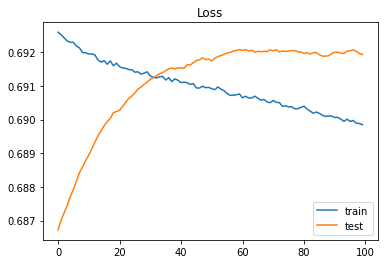

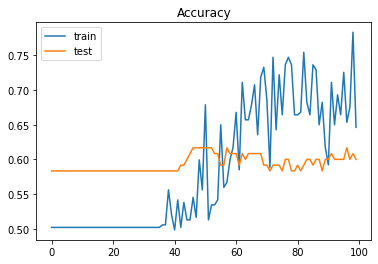

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='test')
plt.legend()
plt.show()
plt.title('Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='test')
plt.legend()
plt.show()
